In [1]:
import pandas as pd
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Data Exploration

In [2]:
df.groupby("Category").describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [3]:
df["spam"] = df["Category"].apply(lambda x: 1 if x=="spam" else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.Message,df.spam,test_size = 0.25,random_state= 41 )

# CountVectorizer is a great tool provided by the scikit-learn library in Python. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x_train_count = vectorizer.fit_transform(x_train.values)
x_train_count.toarray()[:5]



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [6]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train_count,y_train)

MultinomialNB()

# prediction

In [7]:
emails = {
    "hey kartik will be my friend on Insta",
    "hey kartik you 100% off on coursera for the Data Science course"
}

emails_count = vectorizer.transform(emails)
model.predict(emails_count)

array([0, 0], dtype=int64)

In [8]:
x_test_count = vectorizer.transform(x_test)
x_test_count.toarray()[:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
model.predict(x_test_count)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [10]:
model.score(x_train_count , y_train)

0.992581957406078

In [11]:
model.score(x_test_count,y_test)

0.9892318736539842

# acuracy is 98.92%

# sklearn pipeline

# Scikit-learn's pipeline class is a useful tool for encapsulating multiple different transformers alongside an estimator into one object, so that you only have to call your important methods once ( fit() , predict() , etc)

In [13]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ("vectorizer",CountVectorizer()),
    ("nd",MultinomialNB())
])

In [14]:
clf.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nd', MultinomialNB())])

In [15]:
clf.score(x_test,y_test)

0.9892318736539842

In [17]:
y_preds = clf.predict(x_test)

<AxesSubplot:>

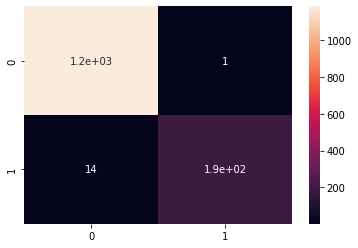

In [19]:
from sklearn.metrics import confusion_matrix ,classification_report
cm = confusion_matrix(y_test,y_preds) 
import seaborn as sns 
sns.heatmap(cm,annot=True)

In [20]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1187
           1       0.99      0.93      0.96       206

    accuracy                           0.99      1393
   macro avg       0.99      0.97      0.98      1393
weighted avg       0.99      0.99      0.99      1393

